In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


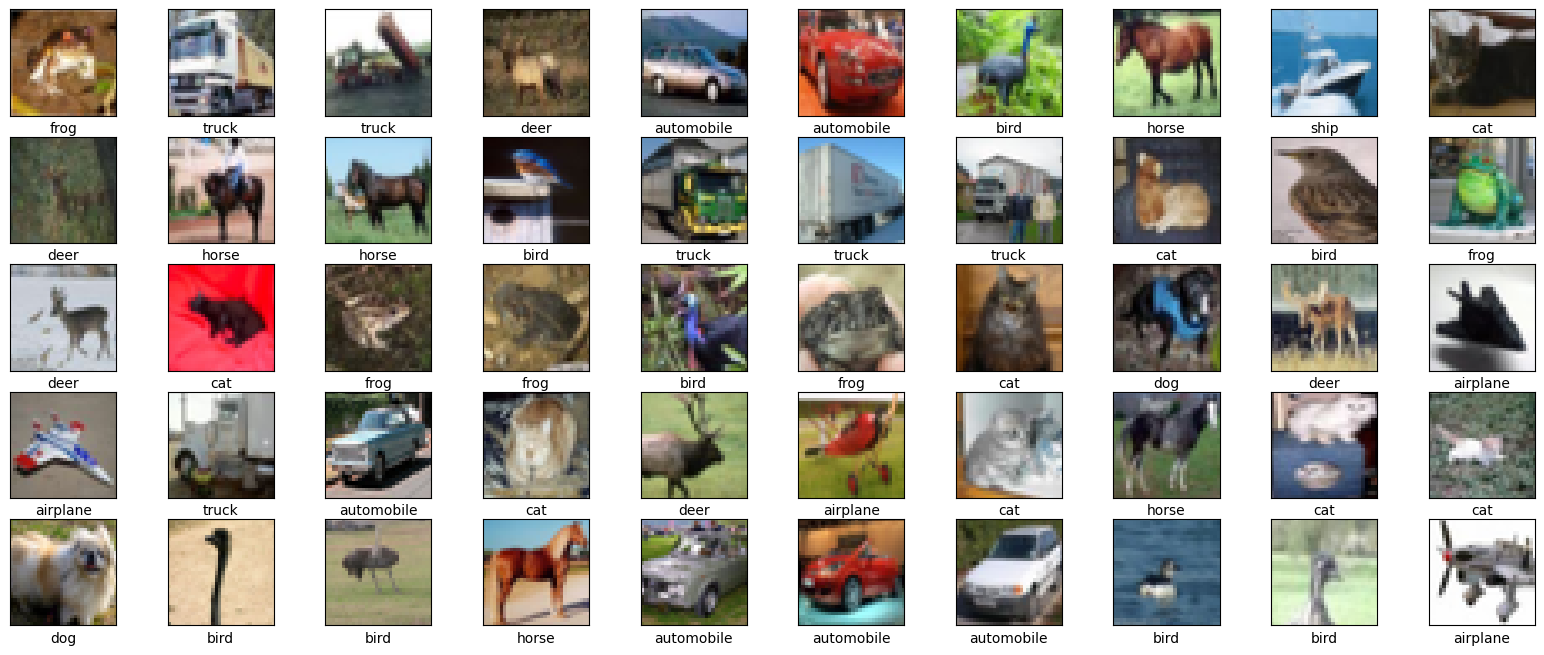

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(20,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [4]:
x_train,x_test=x_train/255.0,x_test/255.0

In [19]:
model=keras.Sequential([
    keras.Input(shape=(32,32,3)),
    layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),


    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,122 (336.41 KB)

 Trainable params: 86,122 (336.41 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3634 - loss: 1.7510 - val_accuracy: 0.5367 - val_loss: 1.3149
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5529 - loss: 1.2603 - val_accuracy: 0.5711 - val_loss: 1.2189
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6078 - loss: 1.1149 - val_accuracy: 0.6031 - val_loss: 1.1255
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6467 - loss: 1.0083 - val_accuracy: 0.6229 - val_loss: 1.0858
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6763 - loss: 0.9315 - val_accuracy: 0.6481 - val_loss: 1.0185


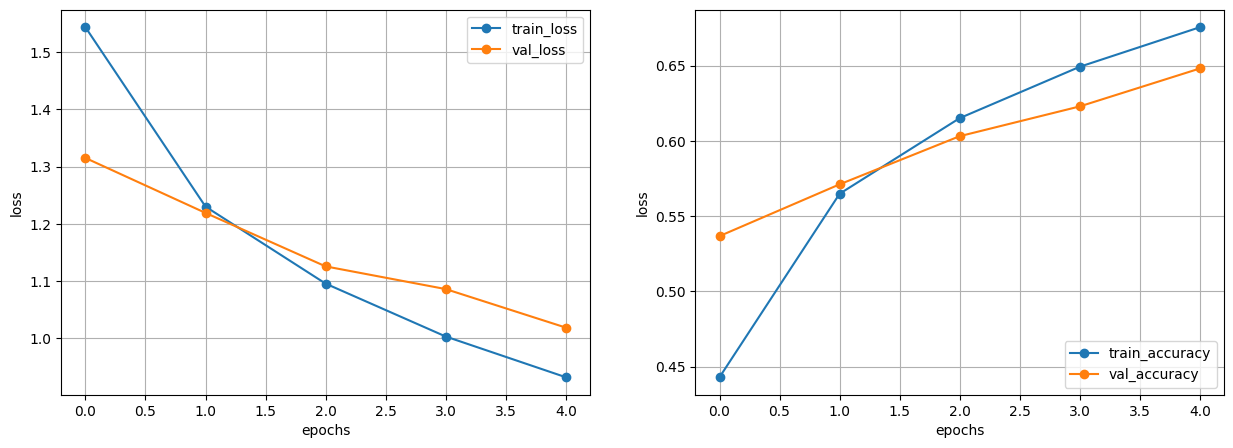

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'o-',label='train_loss')
plt.plot(history.history['val_loss'],'o-',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'o-',label='train_accuracy')
plt.plot(history.history['val_accuracy'],'o-',label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [25]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [27]:
predictions[0]

array([4.4162492e-03, 4.2297595e-04, 2.8548814e-02, 5.0570059e-01,
       7.2761215e-03, 3.9770147e-01, 1.9711277e-02, 5.1446573e-04,
       3.3103112e-02, 2.6049649e-03], dtype=float32)

In [28]:
np.argmax(predictions[0])

np.int64(3)

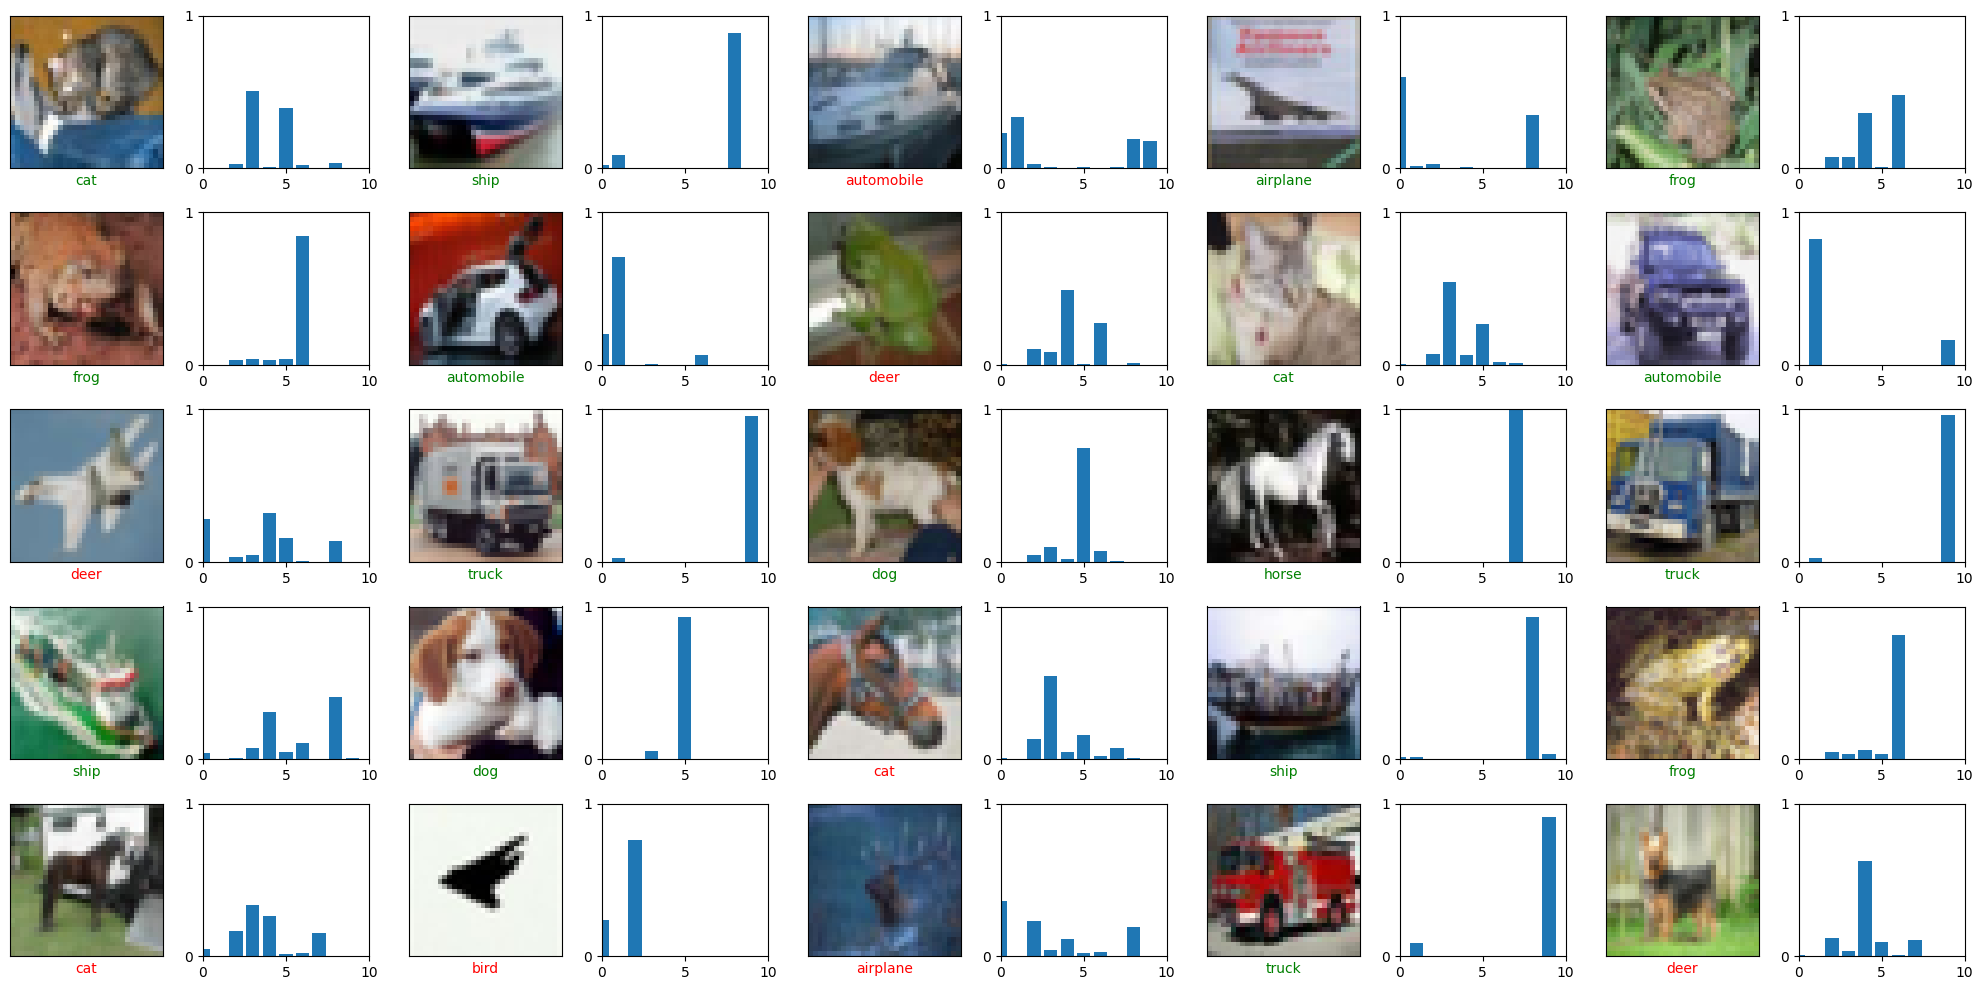

In [34]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))

for i in range(25):
    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i][0]

    if predicted_label == true_label:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='green')
    else:
         plt.xlabel(class_names[np.argmax(predictions[i])], color='red')

    plt.subplot(rows, 2*cols, 2*i + 2)
    plt.bar(range(10), predictions[i],)
    plt.yticks([])
    plt.yticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])
plt.tight_layout()
plt.show()

